<a href="https://colab.research.google.com/github/jack0928/computer-vision-fundamentals/blob/main/02_filtering_edge_and_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

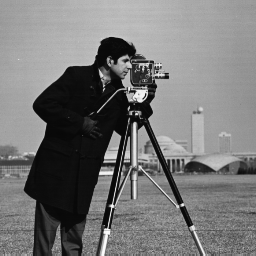

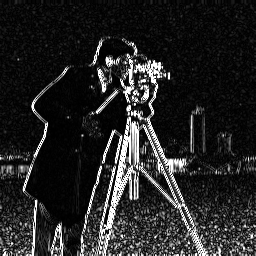

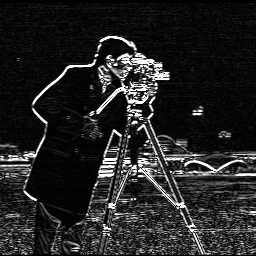

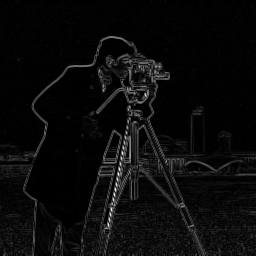

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img=cv.imread('cameraman.tif')
gray=img

# Sobel 미분 계산
# 32F 쓰는 이유는, Sobel 결과는 음수 + 양수가 나오는데
# uint8로 받으면 음수가 날아가니 float 타입으로 받음
grad_x=cv.Sobel(gray,cv.CV_32F,2,0,ksize=3) # x방향 2차 미분
grad_y=cv.Sobel(gray,cv.CV_32F,0,1,ksize=3) # y방향 1차 미분

# grad_x = np.abs(grad_x)
# grad_y = np.abs(grad_y)
# sobel_x = np.uint8(grad_x / np.max(grad_x) * 255)
# sobel_y = np.uint8(grad_y / np.max(grad_y) * 255)

sobel_x=cv.convertScaleAbs(grad_x) # 절댓값 취해 양수 영상으로 변환
sobel_y=cv.convertScaleAbs(grad_y)
# convertScaledAbs()가 하는 일
#	1.	절댓값
#	2.	8-bit 범위(0~255)로 변환
#	3.	자동 스케일링
# >> 위에 주석에서 하는 일을 더 정확하고 간편하게

# edge_strength=cv.addWeighted(sobel_x,0.5,sobel_y,0.5,0) # 에지 강도 계산

edge_strength = np.sqrt(np.power(grad_x,2) + np.power(grad_y,2)) # 에지 강도 계산
edge_strength = edge_strength / np.max(edge_strength) * 255 # 정규화
edge_strength = edge_strength.astype(np.uint8) # 정규화

cv2_imshow(gray)
cv2_imshow(sobel_x)
cv2_imshow(sobel_y)
cv2_imshow(edge_strength)

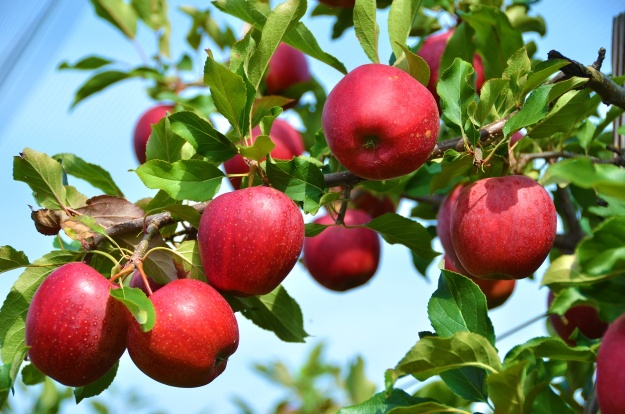

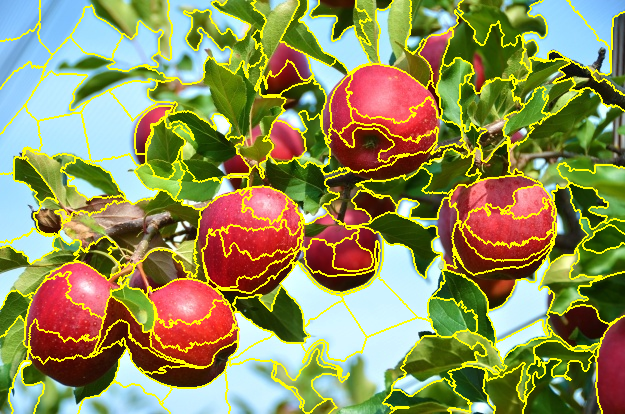

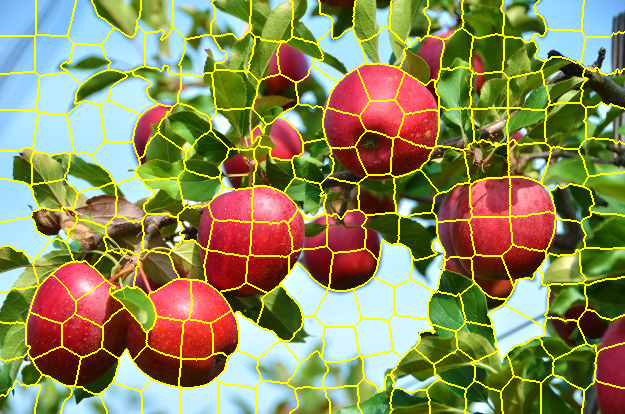

In [ ]:
import skimage
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('apples_small.jpg')
cv2_imshow(img)

# OpenCV는 BGR, scikit-image는 RGB를 기본으로 사용
# 따라서 중간 처리용으로 RGB로 바꿨다가, 출력용으로 다시 BGR로 되돌린다
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# SLIC 슈퍼픽셀 분할
slic1=skimage.segmentation.slic(img,compactness=10,n_segments=200)
sp_img1=skimage.segmentation.mark_boundaries(img,slic1)
sp_img1=np.uint8(sp_img1*255.0)

# SLIC 슈퍼픽셀 분할
slic2=skimage.segmentation.slic(img,compactness=100,n_segments=200)
sp_img2=skimage.segmentation.mark_boundaries(img,slic2)
sp_img2=np.uint8(sp_img2*255.0)

# 다시 OpenCV를 위해 BGR로
sp_img1 = cv.cvtColor(sp_img1, cv.COLOR_RGB2BGR)
sp_img2 = cv.cvtColor(sp_img2, cv.COLOR_RGB2BGR)

cv2_imshow(sp_img1)
cv2_imshow(sp_img2)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


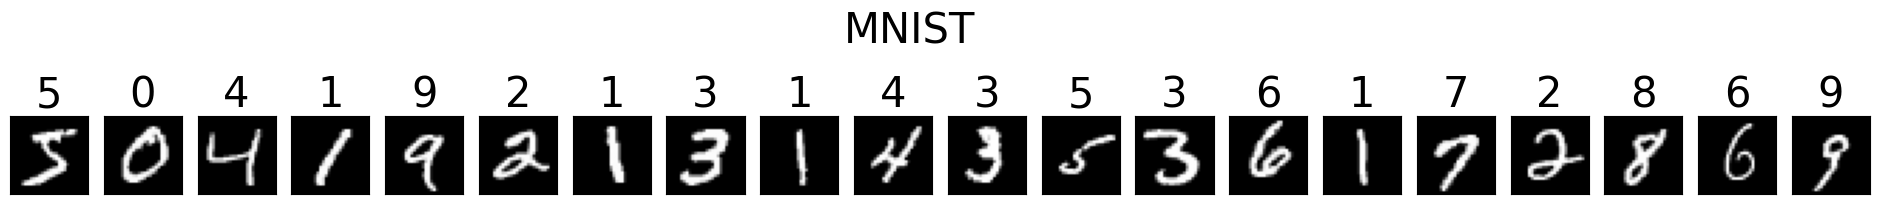

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


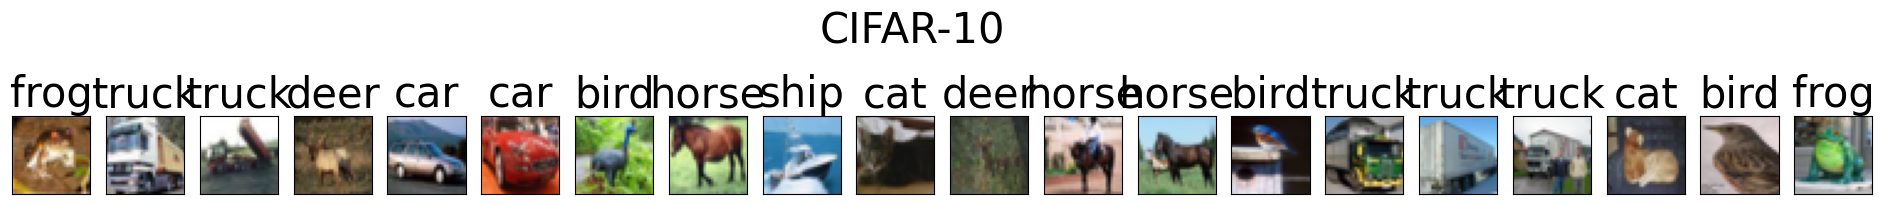

In [ ]:
# 학습용 데이터셋을 불러와서 구조를 확인하고, 예시 이미지를 시각화
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

# ======================
# MNIST 데이터셋 로드
# ======================
# 손글씨 숫자(0~9), 흑백 28x28 이미지
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

# 데이터 크기 출력
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 앞의 10개 학습 이미지를 한 줄로 시각화
plt.figure(figsize=(24, 3))
plt.suptitle('MNIST', fontsize=30)

for i in range(10):
    plt.subplot(1, 10, i + 1)          # 1행 10열 서브플롯
    plt.imshow(x_train[i], cmap='gray')  # 흑백 이미지 표시
    plt.xticks([]); plt.yticks([])     # 축 제거
    plt.title(str(y_train[i]), fontsize=30)  # 정답 숫자 표시

plt.show()


# ======================
# CIFAR-10 데이터셋 로드
# ======================
# 10개 클래스의 컬러 이미지 (32x32x3)
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()

# 데이터 크기 출력
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# CIFAR-10 클래스 이름
class_names = [
    'airplane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 앞의 10개 학습 이미지를 한 줄로 시각화
plt.figure(figsize=(24, 3))
plt.suptitle('CIFAR-10', fontsize=30)

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])             # 컬러 이미지 표시
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i, 0]], fontsize=30)  # 클래스 이름 표시

plt.show()